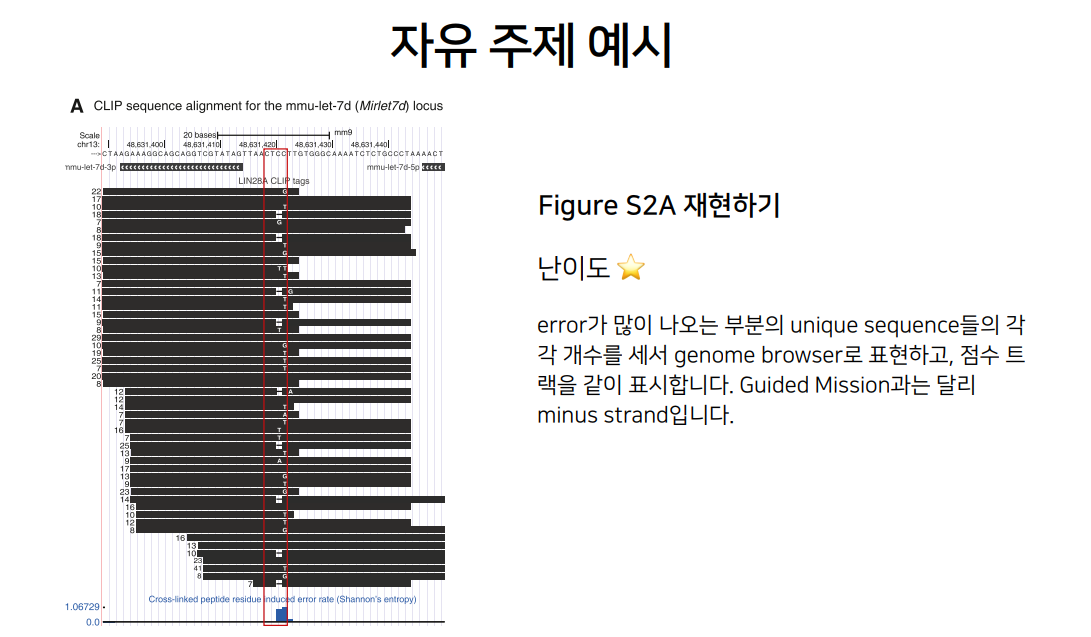

파이널프로젝트는 Figure S2A를 재현하는 것으로 정했다. <br>
error가 많이 나오는 부분의 unique sequence들의 각각 개수를 세서 genome brower로 표현하고, 점수 트랙을 같이 표현한다. Guided Mission과 달리 minus strand이다.

In [2]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import ssl
from pandasai import PandasAI

from pandasai.llm.starcoder import Starcoder

In [4]:
%cd ./binfo1-datapack1/
print(os.getcwd)
!grep -i mirlet7g gencode.gtf
!samtools view -b -o CLIP-let7g.bam CLIP-35L33G.bam chr9:106056039-106056126
!samtools view CLIP-let7g.bam | wc -l
!samtools mpileup CLIP-let7g.bam > CLIP-let7g.pileup
!wc -l CLIP-let7g.pileup
!head CLIP-let7g.pileup
!awk '$2 >= 106056039 && $2 <= 106056126 { print $0; }' CLIP-let7g.pileup > CLIP-let7g-gene.pileup
!tail CLIP-let7g-gene.pileup

/home/kim05/bioinfo1/binfo1-datapack1
<built-in function getcwd>
chr9	ENSEMBL	gene	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; gene_type "miRNA"; gene_name "Mirlet7g"; level 3; mgi_id "MGI:2676800";
chr9	ENSEMBL	transcript	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";
chr9	ENSEMBL	exon	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; exon_number 1; exon_id "ENSMUSE00000522665.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";
163
[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
68548 CLIP-let7g.pileup
chr9	106007092	N	9	^Ga^Ia^Ha^Ia^Ga^Ga^Ha^Ia^Ia	<IFIGGH

In [3]:
hugging_token = ''

In [4]:
# Instantiate a LLM
llm = Starcoder(api_token= hugging_token)

pandas_ai = PandasAI(llm)

APIKeyNotFoundError: HuggingFace Hub API key is required

In [ ]:


pileup = pd.read_csv('CLIP-let7g-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup.tail()

이전 코드는 환경 구축용이었고, 지금부터 mmu-let-7d (Mirlet7d) locus를 진행해보려 한다.

In [5]:
#%cd ./binfo1-datapack1/
print(os.getcwd)
!grep -i mirlet7d gencode.gtf

<built-in function getcwd>
chr13	ENSEMBL	gene	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; gene_type "miRNA"; gene_name "Mirlet7d"; level 3; mgi_id "MGI:2676796";
chr13	ENSEMBL	transcript	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";
chr13	ENSEMBL	exon	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; exon_number 1; exon_id "ENSMUSE00000522678.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";


In [ ]:
!samtools view -b -o CLIP-let7g.bam CLIP-35L33G.bam chr9:106056039-106056126

In [ ]:


!samtools view CLIP-let7g.bam | wc -l
!samtools mpileup CLIP-let7g.bam > CLIP-let7g.pileup
!wc -l CLIP-let7g.pileup
!head CLIP-let7g.pileup
!awk '$2 >= 106056039 && $2 <= 106056126 { print $0; }' CLIP-let7g.pileup > CLIP-let7g-gene.pileup
!tail CLIP-let7g-gene.pileup